# Analyzing our dataset

This notebook is created with the purpose of understanding our dataset and finding relationships/patterns in our data before building the machine learning models.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  object 
 6   marital_status        593994 non-null  object 
 7   education_level       593994 non-null  object 
 8   employment_status     593994 non-null  object 
 9   loan_purpose          593994 non-null  object 
 10  grade_subgrade        593994 non-null  object 
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 54.4+ MB
Categorical: ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 

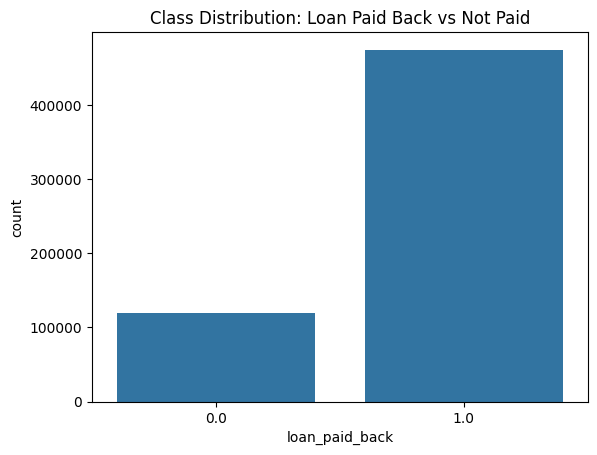

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

if "id" in train.columns:
    train = train.drop(columns=["id"])

train.info()

# Checking missing values
train.isna().sum()

# Descriptive statistics for numeric features
numeric_summary = train.describe()
numeric_summary

# Identify column types
categorical_cols = train.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = train.select_dtypes(include=["float64", "int64"]).columns.tolist()

print("Categorical:", categorical_cols)
print("Numeric:", numeric_cols)

# Check how balanced the dataset is
train["loan_paid_back"].value_counts()

# Plot class distribution
sns.countplot(data=train, x="loan_paid_back")
plt.title("Class Distribution: Loan Paid Back vs Not Paid")
plt.show()

## Distribution plots

Understanding how the numerical features in our datasets are distributed.

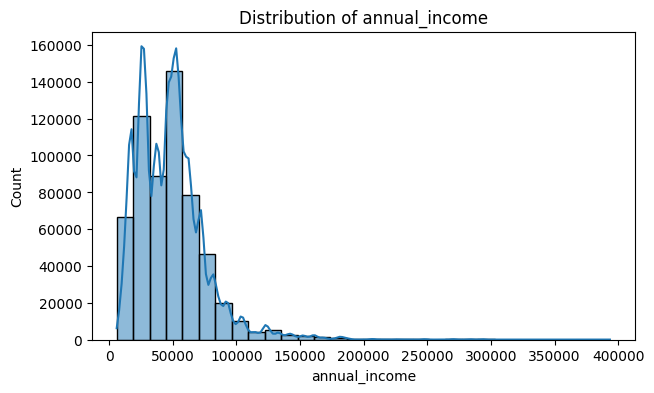

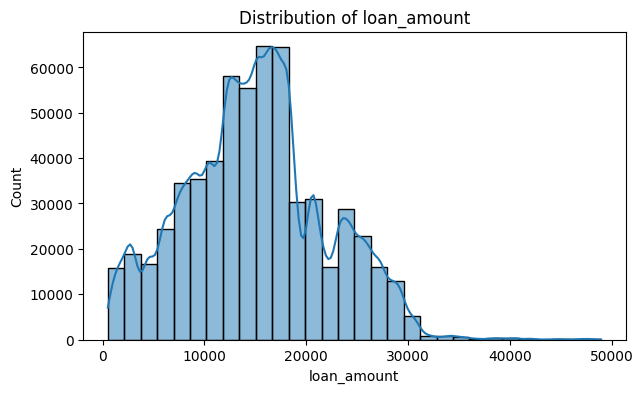

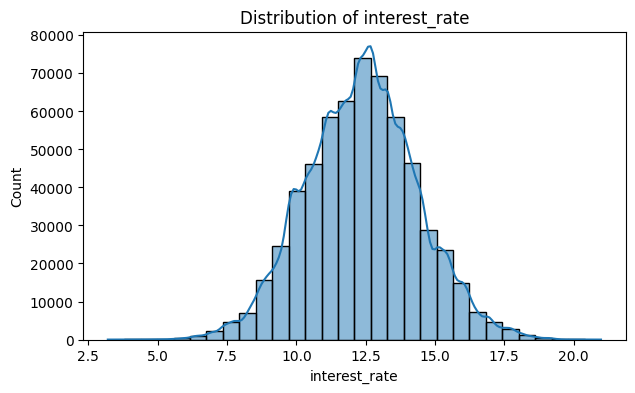

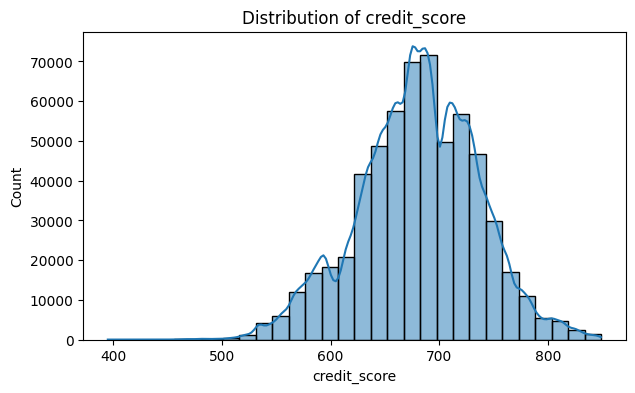

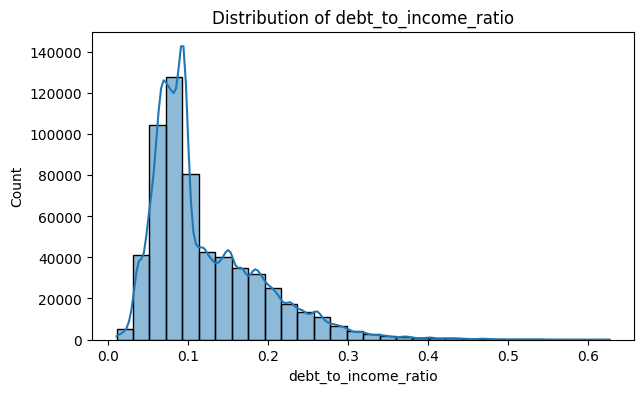

In [3]:
### Distribution plots
dist_features = [
    "annual_income",
    "loan_amount",
    "interest_rate",
    "credit_score",
    "debt_to_income_ratio",
]

for col in dist_features:
    if col in train.columns:
        plt.figure(figsize=(7,4))
        sns.histplot(train[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.show()
    else:
        print(f"{col} not found.")


## Feature Analysis: Patterns in Loan Repayment

Finding patterns in our dataset. We are trying to find out which features in our dataset affect loan repayment and by how much.

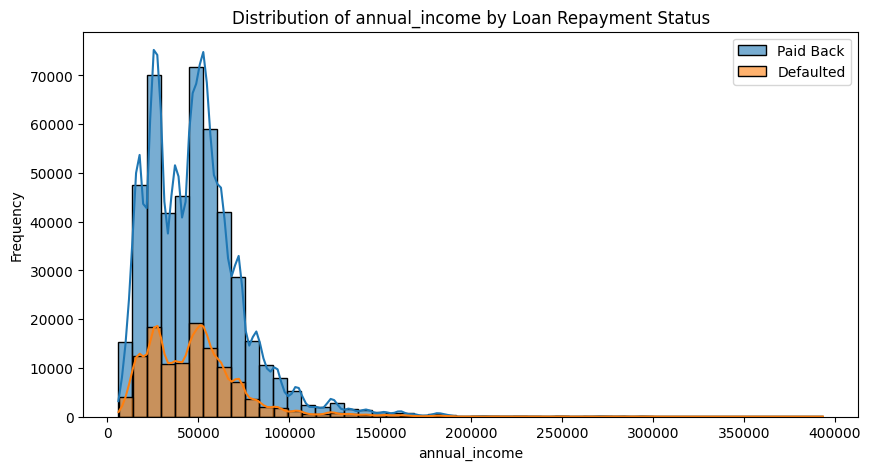

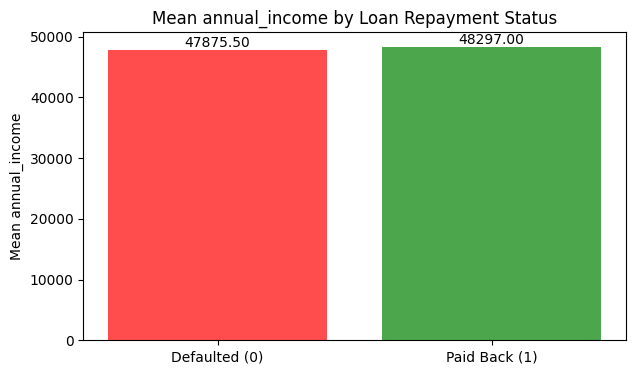

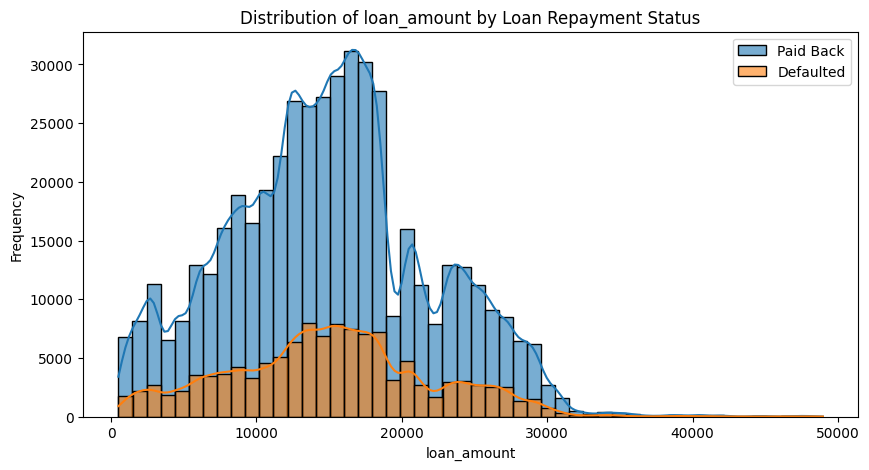

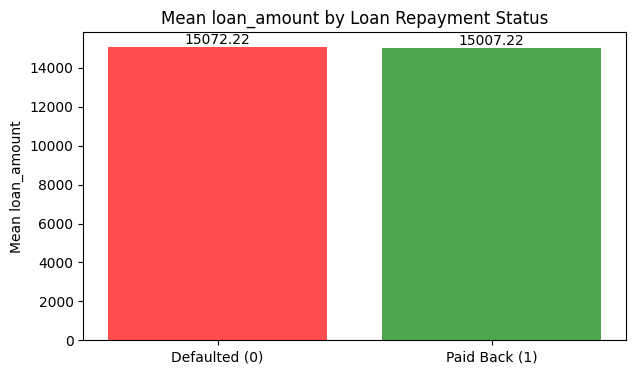

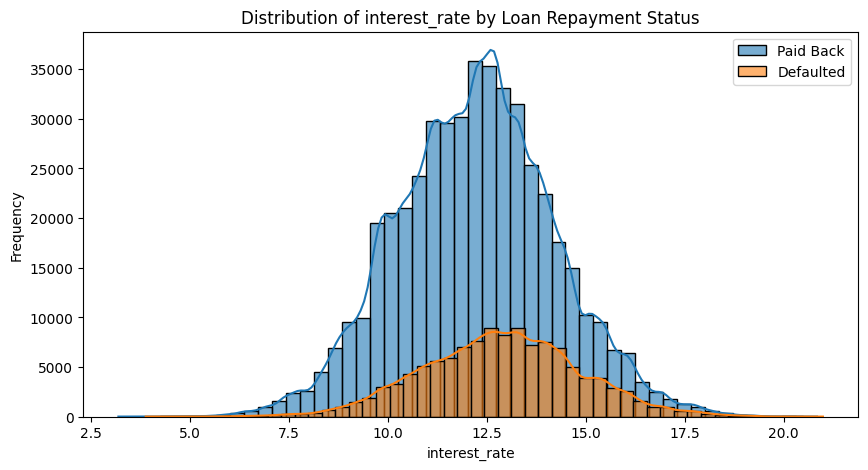

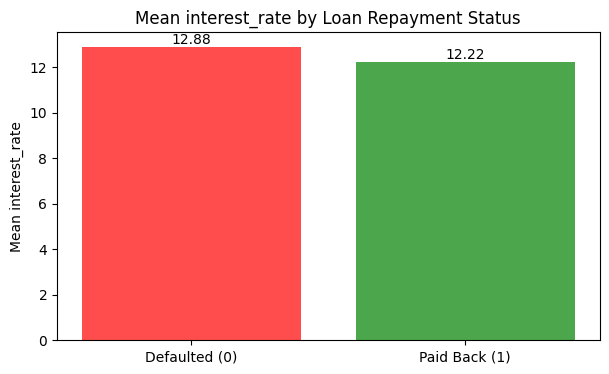

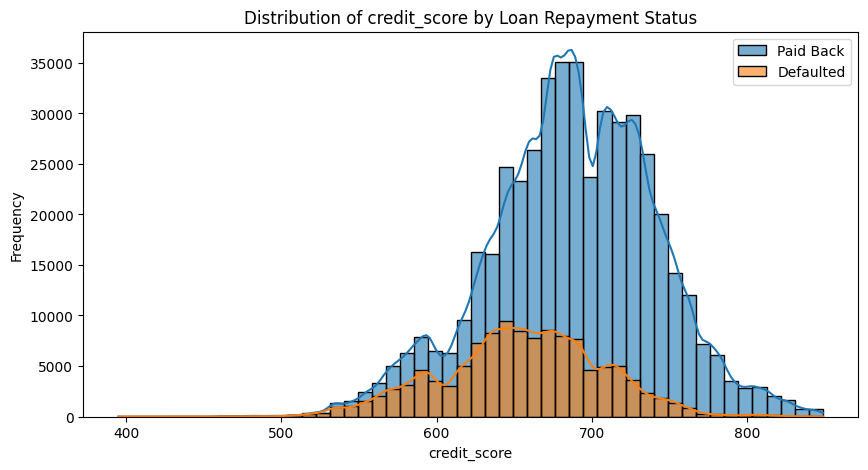

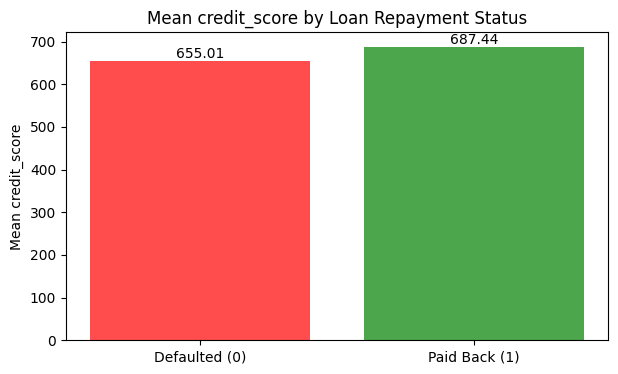

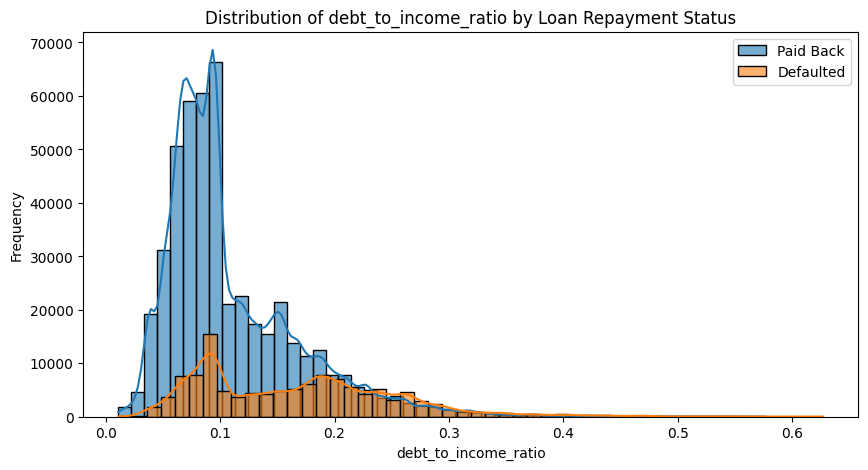

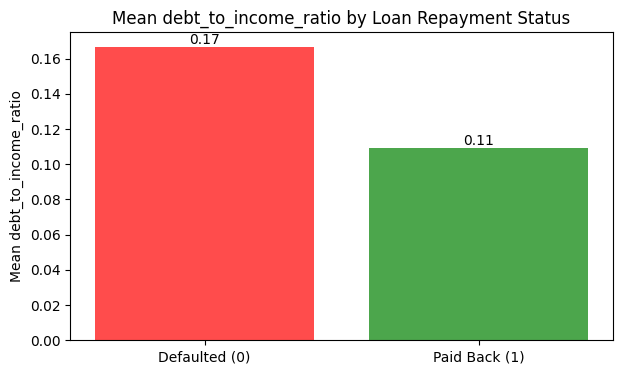

In [4]:
# Compare distributions of numeric features by loan repayment status
numeric_features = ["annual_income", "loan_amount", "interest_rate", "credit_score", "debt_to_income_ratio"]

for col in numeric_features:
    if col in train.columns:
        plt.figure(figsize=(10, 5))
        # Create overlapping histograms
        sns.histplot(data=train[train["loan_paid_back"] == 1], x=col, 
                    label="Paid Back", alpha=0.6, kde=True, bins=50)
        sns.histplot(data=train[train["loan_paid_back"] == 0], x=col, 
                    label="Defaulted", alpha=0.6, kde=True, bins=50)
        plt.title(f"Distribution of {col} by Loan Repayment Status")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()
        
        # Also show mean comparison
        plt.figure(figsize=(7, 4))
        means = train.groupby("loan_paid_back")[col].mean()
        bars = plt.bar(["Defaulted (0)", "Paid Back (1)"], means.values, 
                      color=["red", "green"], alpha=0.7)
        plt.title(f"Mean {col} by Loan Repayment Status")
        plt.ylabel(f"Mean {col}")
        for i, (bar, mean) in enumerate(zip(bars, means.values)):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
                    f'{mean:.2f}', ha='center', va='bottom')
        plt.show()
    else:
        print(f"{col} not found.")

## Analyzing categorical features

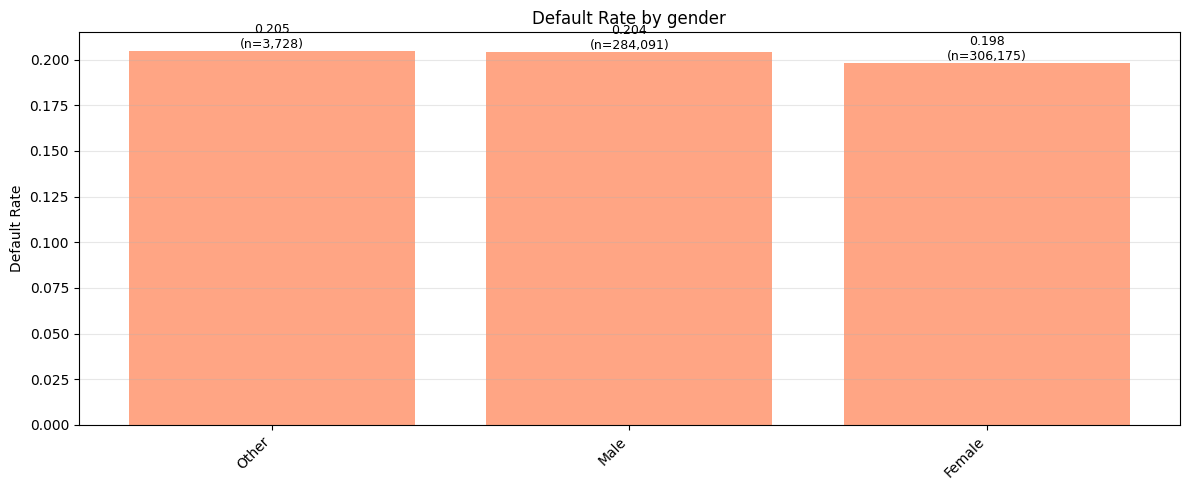

<Figure size 1200x500 with 0 Axes>

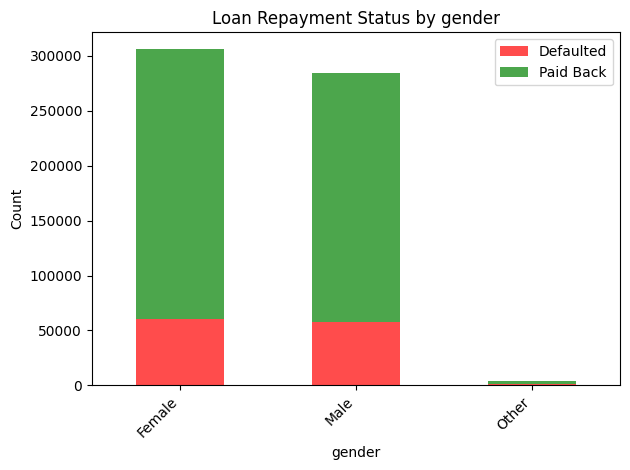

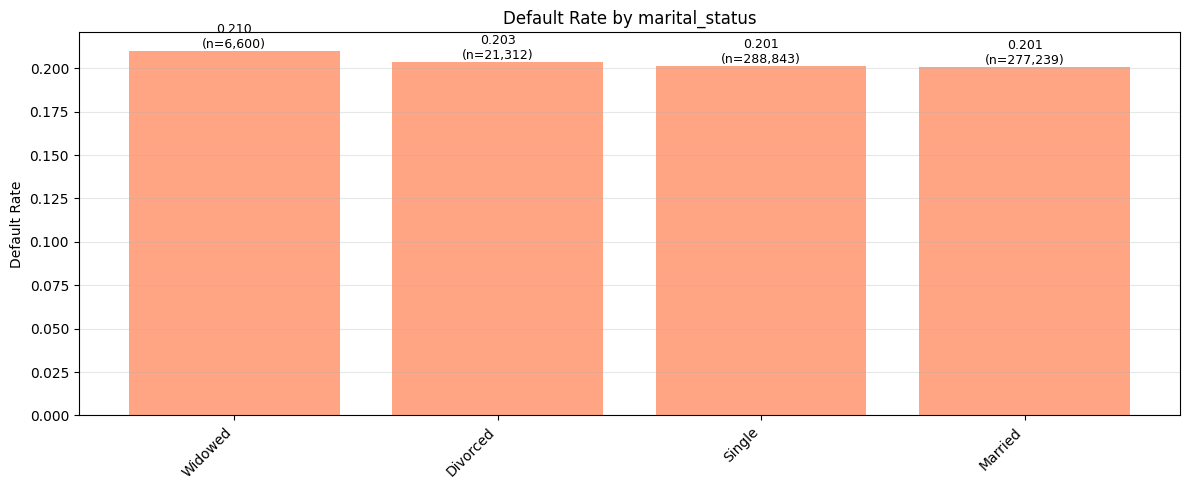

<Figure size 1200x500 with 0 Axes>

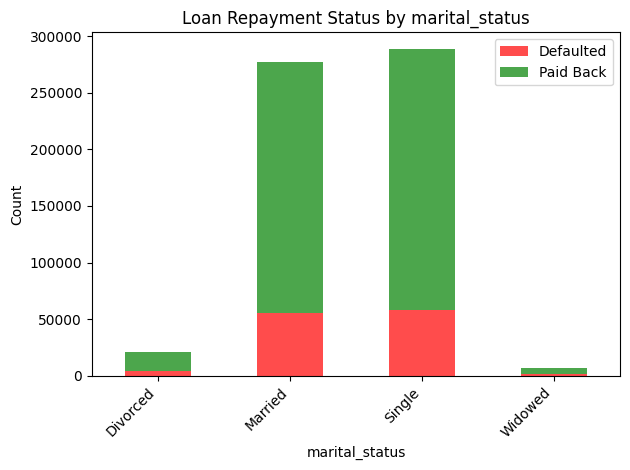

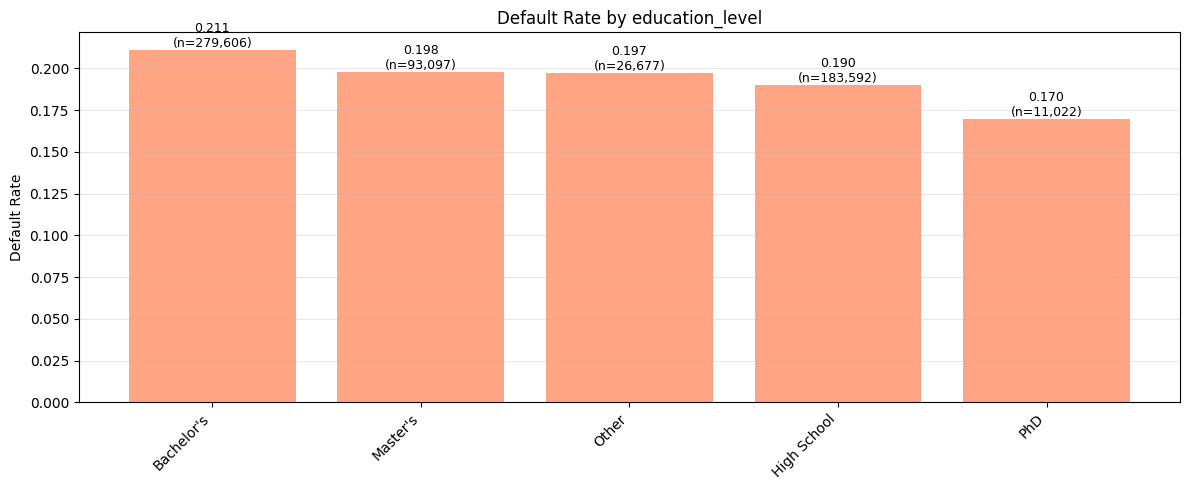

<Figure size 1200x500 with 0 Axes>

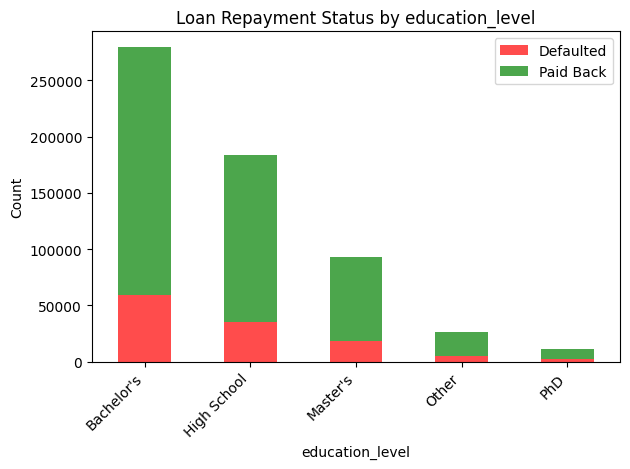

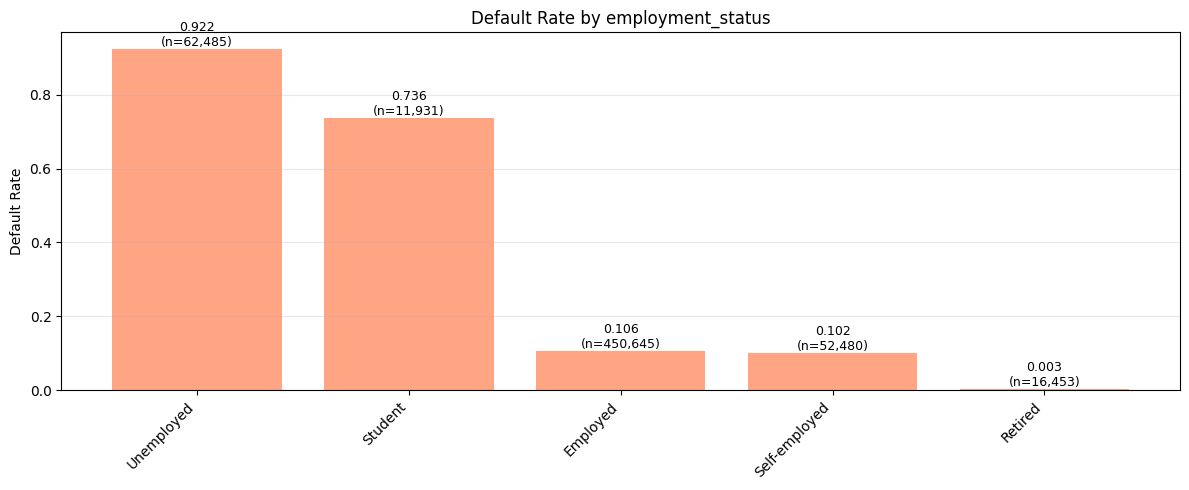

<Figure size 1200x500 with 0 Axes>

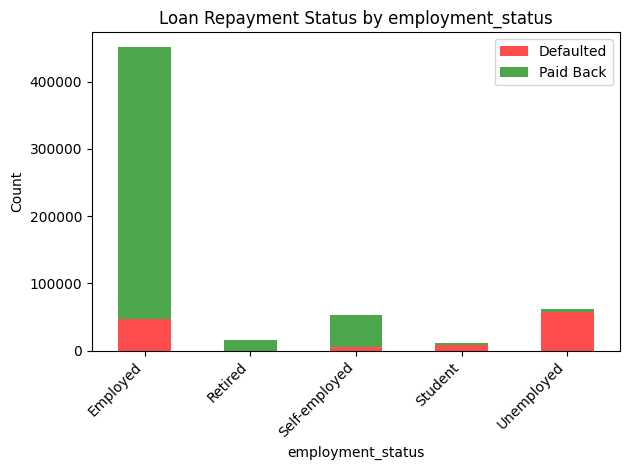

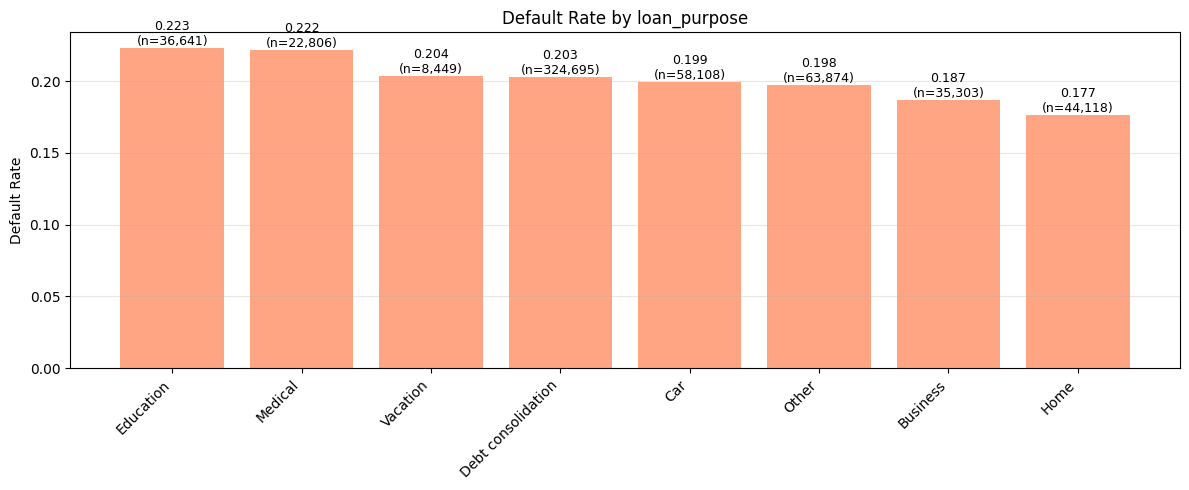

<Figure size 1200x500 with 0 Axes>

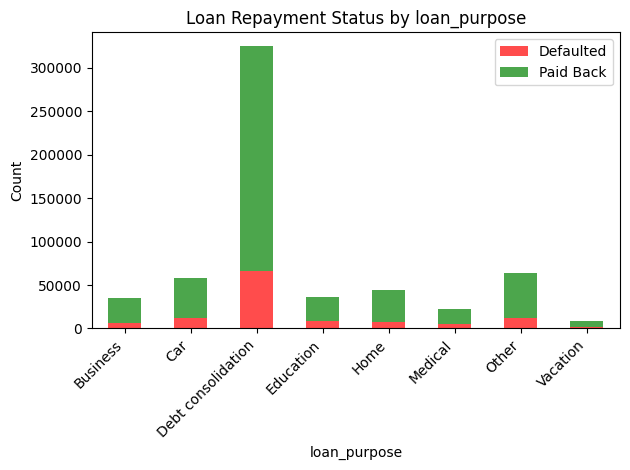

In [5]:
# Analyze categorical features: default rates by category
categorical_features = ["gender", "marital_status", "education_level", "employment_status", "loan_purpose"]

for col in categorical_features:
    if col in train.columns:
        # Calculate default rates
        default_rates = train.groupby(col)["loan_paid_back"].agg(["mean", "count"])
        default_rates["default_rate"] = 1 - default_rates["mean"]  # Convert to default rate
        default_rates = default_rates.sort_values("default_rate", ascending=False)
        
        # Plot default rates
        plt.figure(figsize=(12, 5))
        bars = plt.bar(range(len(default_rates)), default_rates["default_rate"], 
                      color="coral", alpha=0.7)
        plt.xticks(range(len(default_rates)), default_rates.index, rotation=45, ha="right")
        plt.ylabel("Default Rate")
        plt.title(f"Default Rate by {col}")
        plt.grid(axis="y", alpha=0.3)
        
        # Add count labels on bars
        for i, (bar, count) in enumerate(zip(bars, default_rates["count"])):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
                    f'{default_rates["default_rate"].iloc[i]:.3f}\n(n={count:,})', 
                    ha='center', va='bottom', fontsize=9)
        plt.tight_layout()
        plt.show()
        
        # Also show count comparison
        plt.figure(figsize=(12, 5))
        repayment_by_cat = train.groupby([col, "loan_paid_back"]).size().unstack(fill_value=0)
        repayment_by_cat.plot(kind="bar", stacked=True, color=["red", "green"], alpha=0.7)
        plt.title(f"Loan Repayment Status by {col}")
        plt.ylabel("Count")
        plt.xlabel(col)
        plt.legend(["Defaulted", "Paid Back"])
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col} not found.")
